In [53]:

import numpy as np
import cv2 
import os
from PIL import Image
import shutil
import random
import joblib
import matplotlib.pyplot as plt

Create training and test sets of cats and dogs

In [5]:
datapath = '/Users/blanchepenafiel/Desktop/Dataset'
all_cats = datapath + '/Cat'
all_dogs = datapath + '/Dog'


In [6]:
preprocess_path = os.path.join(datapath, 'Preprocess_Color')
preprocess_cats = os.path.join(preprocess_path, 'Cat')
preprocess_dogs = os.path.join(preprocess_path, 'Dog')

In [7]:

train_path = os.path.join(preprocess_path, 'train')
val_path = os.path.join(preprocess_path, 'val')
test_path = os.path.join(preprocess_path, 'test')
train_cats = os.path.join(train_path, 'Cat')
train_dogs = os.path.join(train_path, 'Dog')
val_cats = os.path.join(val_path, 'Cat')
val_dogs = os.path.join(val_path, 'Dog')
test_cats = os.path.join(test_path, 'Cat')
test_dogs = os.path.join(test_path, 'Dog')

Train the first Random Forest Model with Color images that have been resized and flattened

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize


In [10]:
# Define paths
color_cat_path = '/Users/blanchepenafiel/Desktop/Dataset/Preprocess_Color/train/Cat'
color_dog_path = '/Users/blanchepenafiel/Desktop/Dataset/Preprocess_Color/train/Dog'

# Function to load and preprocess images
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = imread(os.path.join(folder_path, filename))
        img = resize(img, (128, 128))  #Resised
        images.append(img.flatten())  # Flatten
    return images

# Load cat images
cat_images = load_images(color_cat_path)
cat_labels = ['cat'] * len(cat_images)

# Load dog images
dog_images = load_images(color_dog_path)
dog_labels = ['dog'] * len(dog_images)




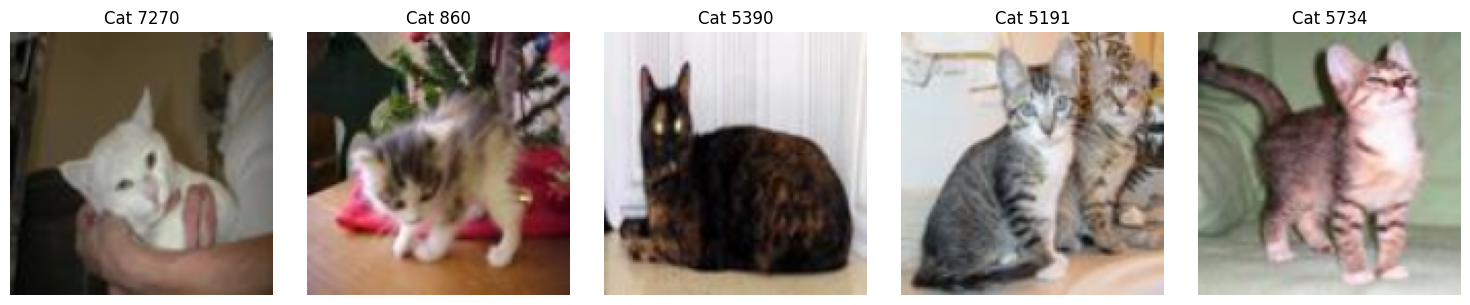

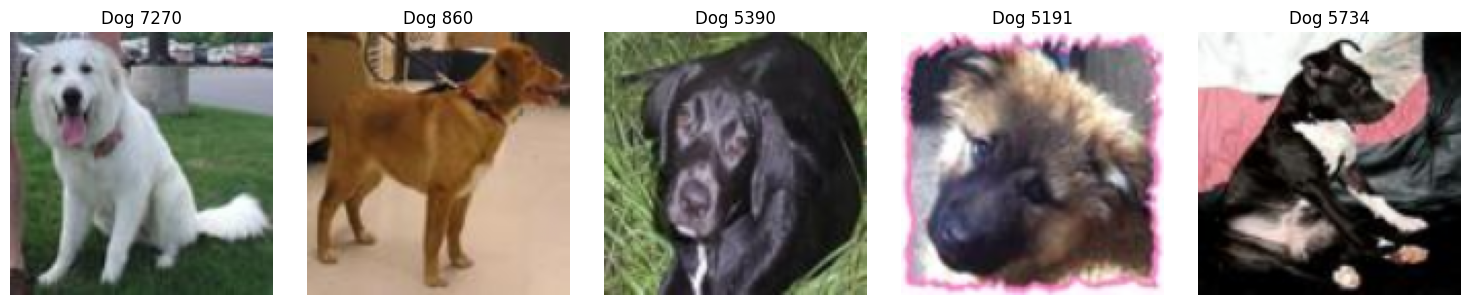

In [24]:
import matplotlib.pyplot as plt

# Plot 5 random cat images

np.random.seed(42) 
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    # Select a random index for a cat image
    idx = np.random.randint(len(cat_images))
    # Reshape the flattened image to its original dimensions
    img = cat_images[idx].reshape(128, 128, 3)
    # Plot the image
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title('Cat {}'.format(idx))

plt.tight_layout()
plt.show()

# Plot 5 random dog images
np.random.seed(42) 
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    # Select a random index for a dog image
    idx = np.random.randint(len(dog_images))
    # Reshape the flattened image to its original dimensions
    img = dog_images[idx].reshape(128, 128, 3)
    # Plot the image
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title('Dog {}'.format(idx))

plt.tight_layout()
plt.show()


In [9]:
# Combine cat and dog data
X = np.vstack([cat_images, dog_images])
y = np.hstack([cat_labels, dog_labels])

In [12]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf1.fit(X, y)

RandomForestClassifier(random_state=42)

In [11]:
val_cat_path = '/Users/blanchepenafiel/Desktop/Dataset/Preprocess_Color/val/Cat'
val_dog_path = '/Users/blanchepenafiel/Desktop/Dataset/Preprocess_Color/val/Dog'

In [32]:



# Load cat images from validation folder
val_cat_images = load_images(val_cat_path)
val_cat_labels = ['cat'] * len(val_cat_images)

# Load dog images from validation folder
val_dog_images = load_images(val_dog_path)
val_dog_labels = ['dog'] * len(val_dog_images)

# Combine validation cat and dog data
X_val = np.vstack([val_cat_images, val_dog_images])
y_val = np.hstack([val_cat_labels, val_dog_labels])


# Predict labels for the validation set
y_pred_val = clf1.predict(X_val)

# Calculate validation accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)


Validation Accuracy: 0.6611362493715435


Saving the model in a pickel file

In [50]:

joblib.dump(clf1, 'random_forest_color_clf1.pkl')

['random_forest_color_clf1.pkl']

Random Forest Model with Pixel Intensity preprocessing

In [43]:

def load_preprocessed_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((128, 128))
        img = np.array(img)
        # Apply pixel intensity normalization
        img = img / 255.0
        images.append(img)
    return images


cat_images_2 = load_preprocessed_images(color_cat_path)
dog_images_2 = load_preprocessed_images(color_dog_path)

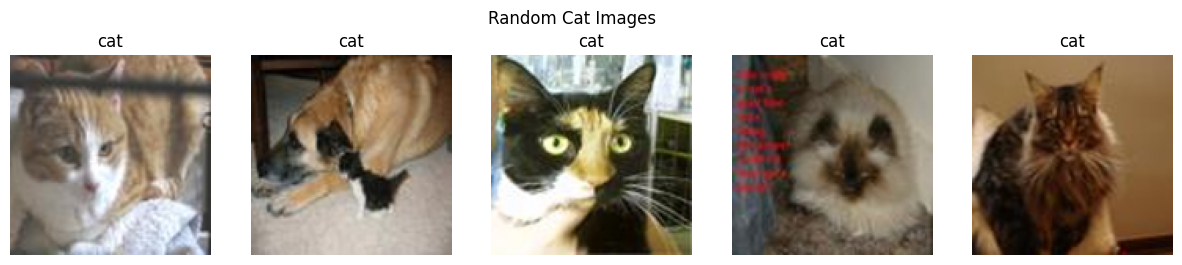

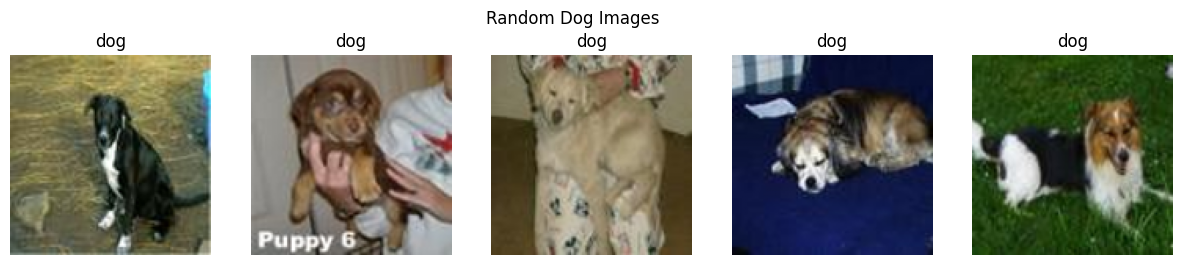

In [44]:
import matplotlib.pyplot as plt
import random

# Function to plot images

def plot_images(images, labels, title):
    
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(title)
    for i in range(5):
        idx = random.randint(0, len(images) - 1)
        axes[i].imshow(images[idx])
        axes[i].axis('off')
        axes[i].set_title(labels[idx])
    plt.show()

# Plot 5 random cat images

plot_images(cat_images_2, ['cat'] * len(cat_images_2), title='Random Cat Images')

# Plot 5 random dog images

plot_images(dog_images_2, ['dog'] * len(dog_images_2), title='Random Dog Images')


In [31]:
cat_labels_2 = ['cat'] * len(cat_images_2)
dog_labels_2 = ['dog'] * len(dog_images_2)

# Combine cat and dog data
X2 = np.vstack([cat_images_2, dog_images_2])
y2 = np.hstack([cat_labels_2, dog_labels_2])

# Reshape X to ensure it's 2D
X2 = X2.reshape(X2.shape[0], -1)

# Train Random Forest classifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X2, y2)


RandomForestClassifier(random_state=42)

In [33]:
# Load cat images from validation folder
val_cat_images_2 = load_preprocessed_images(val_cat_path)
val_cat_labels_2 = ['cat'] * len(val_cat_images_2)

# Load dog images from validation folder
val_dog_images_2 = load_preprocessed_images(val_dog_path)
val_dog_labels_2 = ['dog'] * len(val_dog_images_2)

# Reshape validation data
X_val_2 = np.vstack([val_cat_images_2, val_dog_images_2])
y_val_2 = np.hstack([val_cat_labels_2, val_dog_labels_2])
X_val_2 = X_val_2.reshape(X_val_2.shape[0], -1)

# Predict labels for the validation set
y_pred_val_2 = clf.predict(X_val_2)

# Calculate validation accuracy
accuracy_val_2 = accuracy_score(y_val_2, y_pred_val_2)
print("Validation Accuracy:", accuracy_val_2)

Validation Accuracy: 0.6515837104072398


In [34]:
import joblib

joblib.dump(clf2, 'random_forest_color_clf2.pkl')

['random_forest_color_clf.pkl']

As we can see in the result above, our accuracy did not improve (it actually got worse). This was expected as Random Forest is not, generally, sensitive to small changes in pixel intensity, especially if the changes are consistent across the dataset (which we did in this case). Since each decision tree in the random forest only sees a subset of features (including pixel intensities) during training, small variations in pixel intensity are unlikely to have a significant impact on the overall performance of the random forest as we can see when we compare the results above. 

Random Forest With Edge detection


In [35]:


def load_preprocessed_edge(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            # Apply pixel intensity normalization
            img = img / 255.0
            # Convert image to uint8
            img_uint8 = (img * 255).astype(np.uint8)
            # Apply Canny edge detection directly to the color image
            edges = cv2.Canny(img_uint8, threshold1=30, threshold2=100)
            # Flatten the edge-detected image
            images.append(edges.flatten())
    return images


In [45]:
# Load cat images
cat_images_3= load_preprocessed_edge(color_cat_path)
cat_labels_3 = ['cat'] * len(cat_images_3)

# Load dog images
dog_images_3= load_preprocessed_edge(color_dog_path)
dog_labels_3 = ['dog'] * len(dog_images_3)

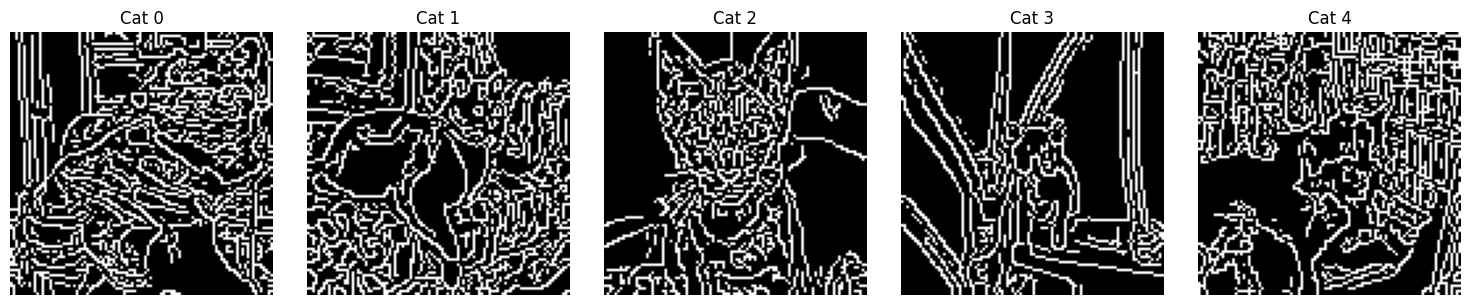

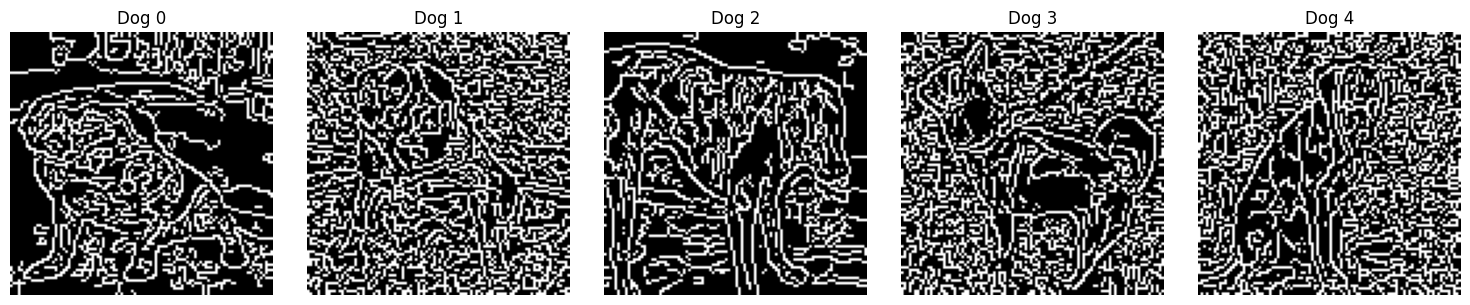

In [46]:
# Plot the first 5 cat images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    # Reshape the flattened image to its original dimensions
    img = cat_images_3[i].reshape(100, 100)
    # Plot the image
    axes[i].imshow(img, cmap='gray')  # Use grayscale colormap
    axes[i].axis('off')
    axes[i].set_title('Cat {}'.format(i))

plt.tight_layout()
plt.show()

# Plot the first 5 dog images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    # Reshape the flattened image to its original dimensions
    img = dog_images_3[i].reshape(100, 100)
    # Plot the image
    axes[i].imshow(img, cmap='gray')  # Use grayscale colormap
    axes[i].axis('off')
    axes[i].set_title('Dog {}'.format(i))

plt.tight_layout()
plt.show()


In [47]:
# Combine cat and dog data
X_train_3 = np.vstack([cat_images_3, dog_images_3])
y_train_3 = np.hstack([cat_labels_3, dog_labels_3])

# Train Random Forest classifier
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3.fit(X_train_3, y_train_3)


RandomForestClassifier(random_state=42)

In [41]:
# Load and preprocess validation cat and dog images
val_cat_images_3 = load_preprocessed_edge(val_cat_path)
val_cat_labels_3 = ['cat'] * len(val_cat_images_3)
val_dog_images_3 = load_preprocessed_edge(val_dog_path)
val_dog_labels_3 = ['dog'] * len(val_dog_images_3)

In [48]:
# Combine validation cat and dog data
X_val_3 = np.array(val_cat_images_3 + val_dog_images_3)
y_val_3 = np.array(val_cat_labels_3 + val_dog_labels_3)

# Predict labels for the validation set
y_pred_val_3 = clf.predict(X_val_3)

# Calculate validation accuracy
accuracy_val_3 = accuracy_score(y_val_3, y_pred_val_3)
print("Validation Accuracy:", accuracy_val_3)

Validation Accuracy: 0.6073403720462544


In [49]:
import joblib

joblib.dump(clf3, 'random_forest_color_clf3.pkl')

['random_forest_color_clf3.pkl']

combining preprocessing methods

In [8]:

# Function to load and preprocess images with edge detection
def load_preprocessed_combined(folder_path, edge_threshold1=30, edge_threshold2=100):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            # Apply pixel intensity normalization
            img = img / 255.0
            # Flatten the original image
            img_flat = img.flatten()
            # Convert image to uint8
            img_uint8 = (img * 255).astype(np.uint8)
            # Apply Canny edge detection directly to the color image
            edges = cv2.Canny(img_uint8, edge_threshold1, edge_threshold2)
            # Flatten the edge-detected image
            edges_flat = edges.flatten()
            # Combine original and edge-detected features
            combined_features = np.concatenate((img_flat, edges_flat))
            images.append(combined_features)
    return images


In [52]:
# Load and preprocess cat and dog images
cat_images_3 = load_preprocessed_combined(color_cat_path, edge_threshold1=30, edge_threshold2=100)
cat_labels_3 = ['cat'] * len(cat_images_3)
dog_images_3 = load_preprocessed_combined(color_dog_path, edge_threshold1=30, edge_threshold2=100)
dog_labels_3 = ['dog'] * len(dog_images_3)

# Combine cat and dog data
X_train = np.array(cat_images_3 + dog_images_3)
y_train = np.array(cat_labels_3 + dog_labels_3)

# Load and preprocess validation cat and dog images
val_cat_images = load_preprocessed_combined(val_cat_path, edge_threshold1=30, edge_threshold2=100)
val_cat_labels = ['cat'] * len(val_cat_images)
val_dog_images = load_preprocessed_combined(val_dog_path, edge_threshold1=30, edge_threshold2=100)
val_dog_labels = ['dog'] * len(val_dog_images)

# Combine validation cat and dog data
X_val = np.array(val_cat_images + val_dog_images)
y_val = np.array(val_cat_labels + val_dog_labels)


In [94]:
# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict labels for the validation set
y_pred_val = clf.predict(X_val)

# Calculate validation accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)


Validation Accuracy: 0.6596279537456008


Edge detection might not always capture the most relevant features for distinguishing between cats and dogs, especially when using a simple algorithm like Canny edge detection.
Edge detection could have removed important imformation from the image (specially the texture and color) which might provide us with a important information to distinguish between a cat and a dog.

we are going to combine original images and the edge detected images as input features and experiment with different thresholds for the Canny edge detector. 

In [15]:

threshold_combinations = [(30, 100), (50, 150), (70, 200)]

for edge_threshold1, edge_threshold2 in threshold_combinations:
    print(f"Testing with edge thresholds: {edge_threshold1}, {edge_threshold2}")
    
    # Load and preprocess cat and dog images with current thresholds
    cat_images_3 = load_preprocessed_combined(color_cat_path, edge_threshold1, edge_threshold2)
    dog_images_3 = load_preprocessed_combined(color_dog_path, edge_threshold1, edge_threshold2)
    
    # Combine cat and dog data
    X_train = np.array(cat_images_3 + dog_images_3)
    y_train = np.array(['cat'] * len(cat_images_3) + ['dog'] * len(dog_images_3))
    
    # Load and preprocess validation cat and dog images with current thresholds
    val_cat_images = load_preprocessed_combined(val_cat_path, edge_threshold1, edge_threshold2)
    val_dog_images = load_preprocessed_combined(val_dog_path, edge_threshold1, edge_threshold2)
    
    # Combine validation cat and dog data
    X_val = np.array(val_cat_images + val_dog_images)
    y_val = np.array(['cat'] * len(val_cat_images) + ['dog'] * len(val_dog_images))

    # Training model
    clf4 = RandomForestClassifier(n_estimators=100, random_state=42)
    clf4.fit(X_train, y_train)
    
    # Predict labels for the validation set
    y_pred_val = clf4.predict(X_val)
    
    # Calculate validation accuracy
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print("Validation Accuracy:", accuracy_val)
  


Testing with edge thresholds: 30, 100
Validation Accuracy: 0.6596279537456008
Testing with edge thresholds: 50, 150
Validation Accuracy: 0.6671694318753142
Testing with edge thresholds: 70, 200
Validation Accuracy: 0.652589240824535


The edge thresdhols (50, 150) gave us the best accuracy.

Using edge_thresholds (50, 150) only.

Validation Accuracy: 0.6671694318753142


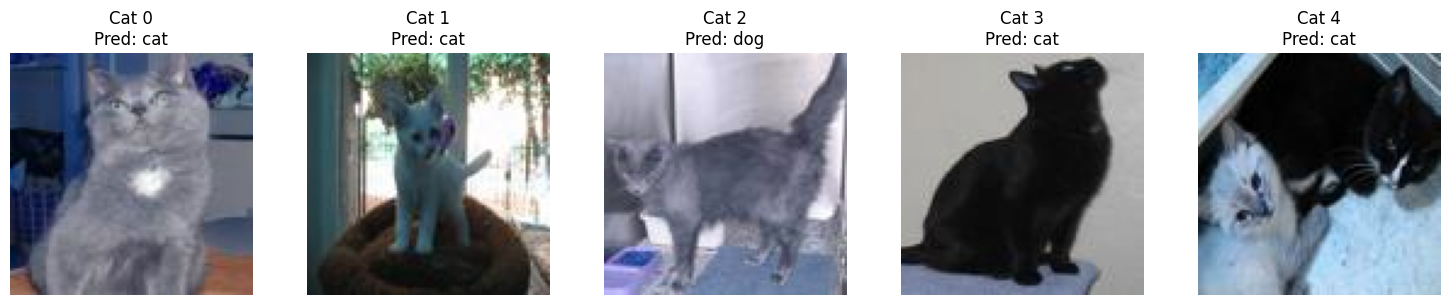

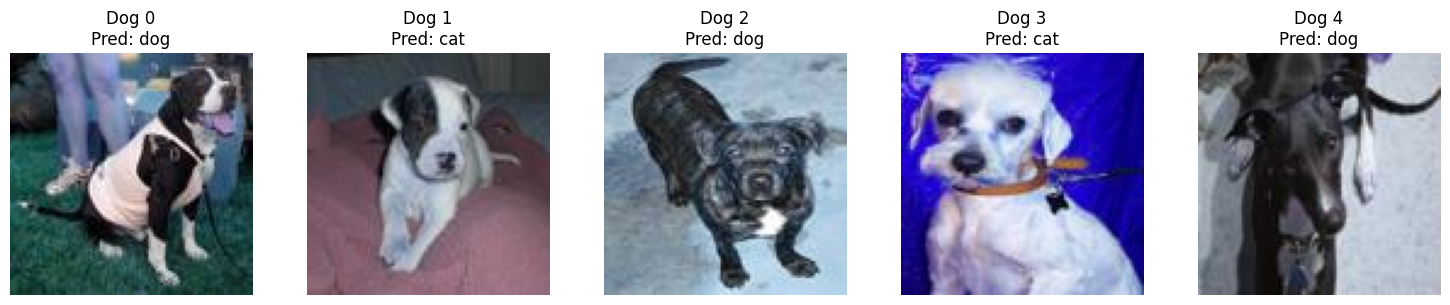

In [16]:


# Function to load and preprocess images with edge detection
def load_preprocessed_combined(folder_path, edge_threshold1=50, edge_threshold2=150):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            # Apply pixel intensity normalization
            img = img / 255.0
            # Flatten the original image
            img_flat = img.flatten()
            # Convert image to uint8
            img_uint8 = (img * 255).astype(np.uint8)
            # Apply Canny edge detection directly to the color image
            edges = cv2.Canny(img_uint8, edge_threshold1, edge_threshold2)
            # Flatten the edge-detected image
            edges_flat = edges.flatten()
            # Combine original and edge-detected features
            combined_features = np.concatenate((img_flat, edges_flat))
            images.append(combined_features)
    return images

# Load and preprocess training images
cat_images_3 = load_preprocessed_combined(color_cat_path)
cat_labels_3 = ['cat'] * len(cat_images_3)
dog_images_3 = load_preprocessed_combined(color_dog_path)
dog_labels_3 = ['dog'] * len(dog_images_3)

# Combine training data
X_train = np.array(cat_images_3 + dog_images_3)
y_train = np.array(cat_labels_3 + dog_labels_3)

# Load and preprocess validation images
val_cat_images = load_preprocessed_combined(val_cat_path)
val_cat_labels = ['cat'] * len(val_cat_images)
val_dog_images = load_preprocessed_combined(val_dog_path)
val_dog_labels = ['dog'] * len(val_dog_images)

# Combine validation data
X_val = np.array(val_cat_images + val_dog_images)
y_val = np.array(val_cat_labels + val_dog_labels)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict labels for the validation set
y_pred_val = clf.predict(X_val)

# Calculate validation accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Plot first 5 cat and dog images with their predictions
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, labels, preds, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        img = images[i][:100*100*3].reshape(100, 100, 3)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'{title} {i}\nPred: {preds[i]}')
    plt.tight_layout()
    plt.show()

# Plot first 5 cat images
plot_images(X_val[:5], y_val[:5], y_pred_val[:5], 'Cat')

# Plot first 5 dog images
plot_images(X_val[len(val_cat_images):len(val_cat_images)+5], y_val[len(val_cat_images):len(val_cat_images)+5], y_pred_val[len(val_cat_images):len(val_cat_images)+5], 'Dog')


Now we aregoint to use Gaussian Blurr in with Edge Canny (using the best treshold)

In [41]:

def preprocess_image(img):
    # aussian blur to reduce noise
    blurred = cv2.GaussianBlur(img, (54, 5), 0)
    
    # Apply Canny edge detection with the best found threshold
    edges = cv2.Canny(blurred, 50, 150)

    combined = np.dstack((blurred, edges))
    
    img_flattened = combined.flatten()
    
    return img_flattened

def load_images_and_preprocess(folder):
    images = []
    labels = []
    for label in ['Cat', 'Dog']:
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    preprocessed_img = preprocess_image(img)
                    images.append(preprocessed_img)
                    labels.append(0 if label == 'Cat' else 1)
            except Exception as e:
                pass
    return np.array(images), np.array(labels)

preprocess_path_color = '/Users/blanchepenafiel/Desktop/Dataset/Preprocess_Color'
train_folder_color = os.path.join(preprocess_path_color, 'train')
val_folder_color = os.path.join(preprocess_path_color, 'val')




In [42]:
#Load
X_train_color, y_train_color = load_images_and_preprocess(train_folder_color)
X_val_color, y_val_color = load_images_and_preprocess(val_folder_color)


In [44]:
#Train Model
clf_color = RandomForestClassifier(n_estimators=100, random_state=42)
clf_color.fit(X_train_color, y_train_color)



RandomForestClassifier(random_state=42)

In [45]:
# Predict on the validation set
y_val_pred_color = clf_color.predict(X_val_color)

# Evaluate the model on the validation set
val_accuracy_color = accuracy_score(y_val_color, y_val_pred_color)
print(f"Validation Accuracy: {val_accuracy_color:.2f}")


Validation Accuracy: 0.65


In [46]:

joblib.dump(clf_color, 'random_forest_color_gb_ed.pkl')

['random_forest_color_gb_ed.pkl']

Tuned parameters

In [49]:
def preprocess_image(img, blur_ksize=(5, 5), canny_thresh1=50, canny_thresh2=150):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(img, blur_ksize, 0)
    
    # Apply Canny edge detection with the provided thresholds
    edges = cv2.Canny(blurred, canny_thresh1, canny_thresh2)
    
    # Combine blurred image and edges
    combined = np.dstack((blurred, edges))
    
    # Flatten the combined image into a 1D array
    img_flattened = combined.flatten()
    
    return img_flattened


In [50]:

def load_images_and_preprocess(folder, blur_ksize=(5, 5), canny_thresh1=50, canny_thresh2=150):
    images = []
    labels = []
    for label in ['Cat', 'Dog']:
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    preprocessed_img = preprocess_image(img, blur_ksize, canny_thresh1, canny_thresh2)
                    images.append(preprocessed_img)
                    labels.append(0 if label == 'Cat' else 1)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                pass
    if len(images) == 0:
        raise ValueError(f"No images found in folder {folder}. Please check the directory and image paths.")
    return np.array(images), np.array(labels)

# Define paths
preprocess_path_color = '/Users/blanchepenafiel/Desktop/Dataset/Preprocess_Color'
train_folder_color = os.path.join(preprocess_path_color, 'train')
val_folder_color = os.path.join(preprocess_path_color, 'val')

# Load training and validation data
try:
    X_train_color, y_train_color = load_images_and_preprocess(train_folder_color)
    X_val_color, y_val_color = load_images_and_preprocess(val_folder_color)
except ValueError as e:
    print(e)
    # Exit or handle the error as needed
    exit(1)

# Verify shapes of the loaded data
print(f"Shape of X_train_color: {X_train_color.shape}")
print(f"Shape of y_train_color: {y_train_color.shape}")
print(f"Shape of X_val_color: {X_val_color.shape}")
print(f"Shape of y_val_color: {y_val_color.shape}")


Shape of X_train_color: (21938, 40000)
Shape of y_train_color: (21938,)
Shape of X_val_color: (1989, 40000)
Shape of y_val_color: (1989,)


In [51]:


# Custom function to apply the preprocessing with different parameters to find best parameter for gaussian blurr and edge canny
def custom_preprocess_and_train(blur_ksize, canny_thresh1, canny_thresh2):
    
    try:
        X_train_color, y_train_color = load_images_and_preprocess(train_folder_color, blur_ksize, canny_thresh1, canny_thresh2)
        X_val_color, y_val_color = load_images_and_preprocess(val_folder_color, blur_ksize, canny_thresh1, canny_thresh2)
    except ValueError as e:
        print(e)
        return 0  
    
    # Create and train the Random Forest classifier
    clf_color = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_color.fit(X_train_color, y_train_color)
    
    # Prediction
    y_val_pred_color = clf_color.predict(X_val_color)
    
    
    val_accuracy_color = accuracy_score(y_val_color, y_val_pred_color)
    return val_accuracy_color

# Parameter grid for Gaussian blur and Canny edge detection
param_grid = {
    'blur_ksize': [(3, 3), (5, 5), (7, 7), (9, 9)],
    'canny_thresh1': [50, 100, 150],
    'canny_thresh2': [100, 150, 200]
}

param_grid_flat = [dict(zip(param_grid, v)) for v in itertools.product(*param_grid.values())]

# Perform grid search
best_params = None
best_score = 0
for params in param_grid_flat:
    print(f"Testing parameters: {params}")  # Debugging statement
    score = custom_preprocess_and_train(params['blur_ksize'], params['canny_thresh1'], params['canny_thresh2'])
    print(f"Validation accuracy: {score:.2f}")  # Debugging statement
    if score > best_score:
        best_score = score
        best_params = params

print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_score:.2f}")

# Load data with best parameters and train final model
X_train_color, y_train_color = load_images_and_preprocess(train_folder_color, best_params['blur_ksize'], best_params['canny_thresh1'], best_params['canny_thresh2'])
X_val_color, y_val_color = load_images_and_preprocess(val_folder_color, best_params['blur_ksize'], best_params['canny_thresh1'], best_params['canny_thresh2'])

clf_color = RandomForestClassifier(n_estimators=100, random_state=42)
clf_color.fit(X_train_color, y_train_color)

# Predict on the validation set
y_val_pred_color = clf_color.predict(X_val_color)

# Evaluate the final model on the validation set
val_accuracy_color = accuracy_score(y_val_color, y_val_pred_color)
print(f"Final Validation Accuracy: {val_accuracy_color:.2f}")
print(classification_report(y_val_color, y_val_pred_color, target_names=['Cat', 'Dog']))


Testing parameters: {'blur_ksize': (3, 3), 'canny_thresh1': 50, 'canny_thresh2': 100}
Validation accuracy: 0.65
Testing parameters: {'blur_ksize': (3, 3), 'canny_thresh1': 50, 'canny_thresh2': 150}
Validation accuracy: 0.65
Testing parameters: {'blur_ksize': (3, 3), 'canny_thresh1': 50, 'canny_thresh2': 200}
Validation accuracy: 0.65
Testing parameters: {'blur_ksize': (3, 3), 'canny_thresh1': 100, 'canny_thresh2': 100}
Validation accuracy: 0.64
Testing parameters: {'blur_ksize': (3, 3), 'canny_thresh1': 100, 'canny_thresh2': 150}
Validation accuracy: 0.64
Testing parameters: {'blur_ksize': (3, 3), 'canny_thresh1': 100, 'canny_thresh2': 200}
Validation accuracy: 0.65
Testing parameters: {'blur_ksize': (3, 3), 'canny_thresh1': 150, 'canny_thresh2': 100}
Validation accuracy: 0.64
Testing parameters: {'blur_ksize': (3, 3), 'canny_thresh1': 150, 'canny_thresh2': 150}
Validation accuracy: 0.65
Testing parameters: {'blur_ksize': (3, 3), 'canny_thresh1': 150, 'canny_thresh2': 200}
Validation a

In [58]:

joblib.dump(clf_color, 'random_forest_color_bestparam_gb_ec.pkl')

['random_forest_color_bestparam_gb_ec.pkl']

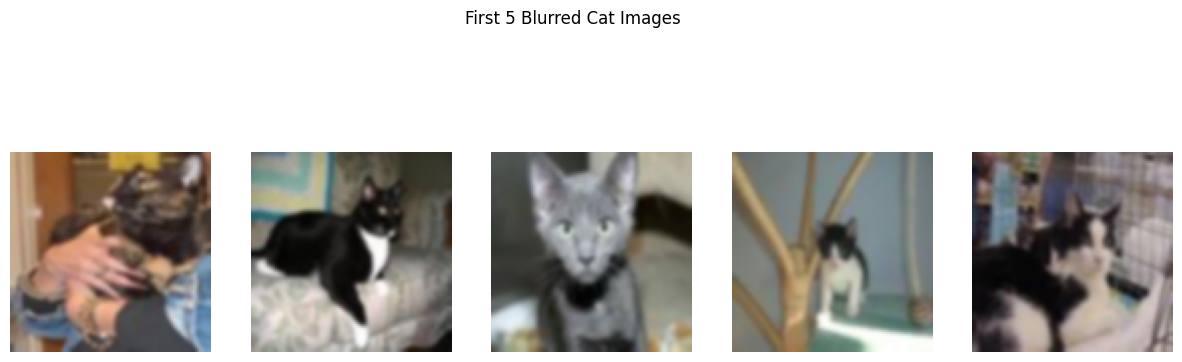

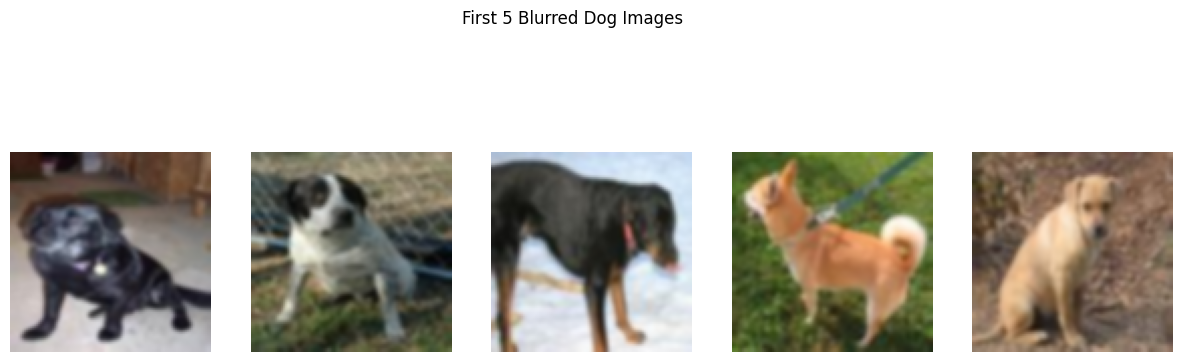

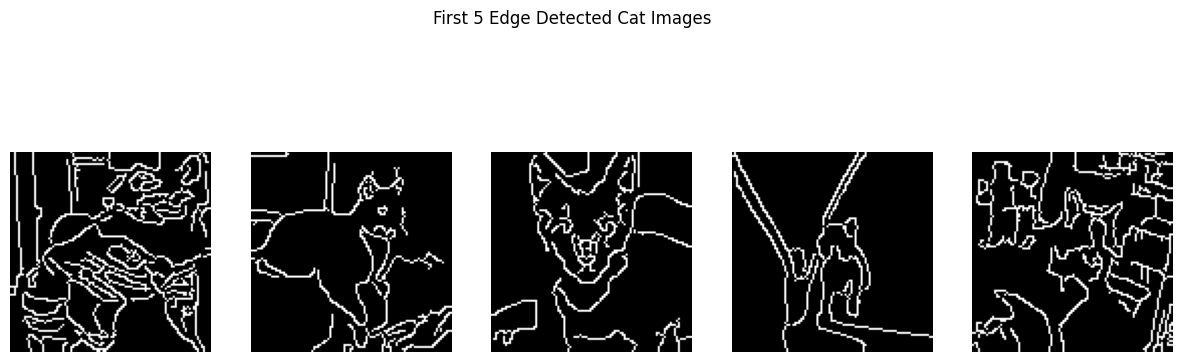

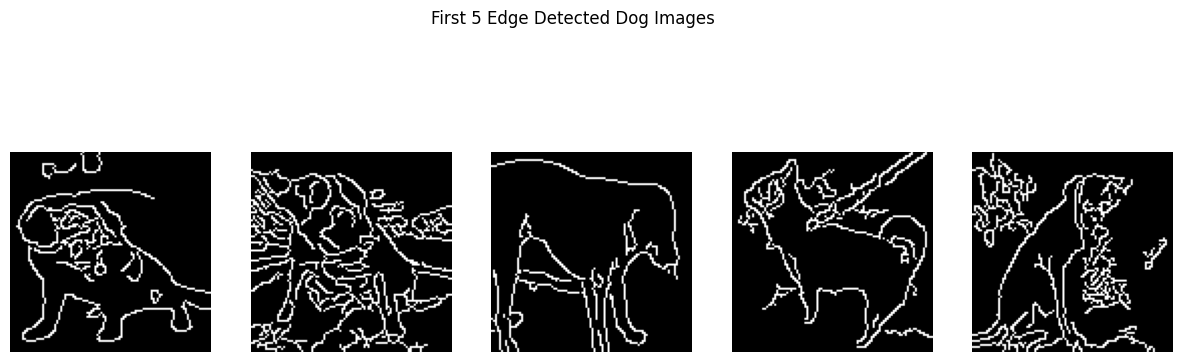

In [56]:


def preprocess_image(img, blur_ksize=(5, 5), canny_thresh1=50, canny_thresh2=200):
    
    blurred = cv2.GaussianBlur(img, blur_ksize, 0)
    
    
    edges = cv2.Canny(blurred, canny_thresh1, canny_thresh2)
    
    return blurred, edges

def load_images_and_preprocess(folder, blur_ksize=(5, 5), canny_thresh1=50, canny_thresh2=200):
    blurred_images = {'Cat': [], 'Dog': []}
    edge_images = {'Cat': [], 'Dog': []}
    for label in ['Cat', 'Dog']:
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder)[:5]:  
            img_path = os.path.join(label_folder, filename)
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    blurred, edges = preprocess_image(img, blur_ksize, canny_thresh1, canny_thresh2)
                    blurred_images[label].append(blurred)
                    edge_images[label].append(edges)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                pass
    return blurred_images, edge_images


preprocess_path_color = '/Users/blanchepenafiel/Desktop/Dataset/Preprocess_Color'
train_folder_color = os.path.join(preprocess_path_color, 'train')

# Best parameters from above
best_params = {'blur_ksize': (5, 5), 'canny_thresh1': 50, 'canny_thresh2': 200}


blurred_images, edge_images = load_images_and_preprocess(train_folder_color, best_params['blur_ksize'], best_params['canny_thresh1'], best_params['canny_thresh2'])

# Display the first 5 preprocessed images for cats and dogs
def display_images(images, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for ax, img in zip(axes, images):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
    fig.suptitle(title)
    plt.show()

def display_edge_images(images, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for ax, img in zip(axes, images):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    fig.suptitle(title)
    plt.show()

# Display blurred images
display_images(blurred_images['Cat'], 'First 5 Blurred Cat Images')
display_images(blurred_images['Dog'], 'First 5 Blurred Dog Images')

# Display edge images
display_edge_images(edge_images['Cat'], 'First 5 Edge Detected Cat Images')
display_edge_images(edge_images['Dog'], 'First 5 Edge Detected Dog Images')


As we can see in the pictures above. the gaussian blur helped get better edge distiction in the images but it not imporve the accuracy.
The edge features extracted by Canny edge detection might not provide additional discriminative information beyond what is already captured by the raw pixel values.

**Grayscale**

We preprocessed the original images to greyscale, resized 128x128, and flattened. then they were saves in local folders.

In [9]:
# Path

preprocess_path_gray = os.path.join(datapath, 'Preprocess_Gray')
preprocess_cats_gray = os.path.join(preprocess_path_gray, 'Cat')
preprocess_dogs_gray = os.path.join(preprocess_path_gray, 'Dog')


In [14]:

# Function to preprocess and copy files
def preprocess_and_copy_files(src_folder, dest_folder):
    files = sorted(os.listdir(src_folder))
    for file_name in files:
        src_file = os.path.join(src_folder, file_name)
        dest_file = os.path.join(dest_folder, file_name)
        try:
            # Open an image file
            with Image.open(src_file) as img:
                # Convert to grayscale
                img = img.convert('L')
                # Resize image
                img = img.resize((128, 128))
                # Save the processed image
                img.save(dest_file)
        except Exception as e:
            pass


# Preprocess and copy cat images
preprocess_and_copy_files(all_cats, preprocess_cats_gray)

# Preprocess and copy dog images
preprocess_and_copy_files(all_dogs, preprocess_dogs_gray)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [16]:


def load_images_from_folder(folder):
    images = []
    labels = []
    for label in ['Cat', 'Dog']:
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            try:
                with Image.open(img_path) as img:
                    img = img.resize((128, 128)) 
                    img_array = np.array(img).flatten()
                    images.append(img_array)
                    labels.append(0 if label == 'Cat' else 1)
            except Exception as e:
               pass
    return np.array(images), np.array(labels)



#


In [15]:

train_folder_gray = os.path.join(preprocess_path_gray, 'Train')
val_folder_gray= os.path.join(preprocess_path_gray, 'Val')
test_folder_gray = os.path.join(preprocess_path_gray, 'Test')

X_train_gray, y_train_gray= load_images_from_folder(train_folder_gray)
X_val_gray, y_val_gray = load_images_from_folder(val_folder_gray)
X_test_gray, y_test_gray = load_images_from_folder(test_folder_gray)

# Create and train the Random Forest classifier
clf_gray = RandomForestClassifier(n_estimators=100, random_state=42)
clf_gray.fit(X_train_gray, y_train_gray)

Error loading image /Users/blanchepenafiel/Desktop/Dataset/Preprocess_Gray/Train/Cat/.DS_Store: cannot identify image file '/Users/blanchepenafiel/Desktop/Dataset/Preprocess_Gray/Train/Cat/.DS_Store'


RandomForestClassifier(random_state=42)

In [20]:


y_test_pred_gray = clf_gray.predict(X_test_gray)
y_val_pred_gray = clf_gray.predict(X_val_gray)




Validation Accuracy: 0.64


In [35]:
# Evaluate 
val_accuracy_gray = accuracy_score(y_val_gray, y_val_pred_gray)
print(f"Validation Accuracy: {val_accuracy_gray}")

Validation Accuracy: 0.6408636124275935


In [33]:

joblib.dump(clf_gray, 'random_forest_gray_1.pkl')

['random_forest_gray_1.pkl']

Pixel Intensity (Grayscale)

In [27]:

def load_images_with_pixel_intensity(folder):
    images = []
    labels = []
    for label in ['Cat', 'Dog']:
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            try:
                with Image.open(img_path) as img:
                    img = img.resize((128, 128)).convert('L')  # Convert to grayscale
                    img_array = np.array(img).flatten()
                    images.append(img_array)
                    labels.append(0 if label == 'Cat' else 1)
            except Exception as e:
                pass
    return np.array(images), np.array(labels)





In [28]:
X_train_gray, y_train_gray = load_images_with_pixel_intensity(train_folder_gray)
X_val_gray, y_val_gray = load_images_with_pixel_intensity(val_folder_gray)
X_test_gray, y_test_gray = load_images_with_pixel_intensity(test_folder_gray)


In [30]:
# Create and train the Random Forest classifier
clf_gray_2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_gray_2.fit(X_train_gray, y_train_gray)

# Predict on the validation and test sets
y_val_pred_gray = clf_gray_2.predict(X_val_gray)





In [36]:

val_accuracy_gray_2 = accuracy_score(y_val_gray, y_val_pred_gray)
print('Accuracy:', val_accuracy_gray)

Accuracy: 0.6408636124275935


We are going to use Gaussian Blur to decrease background noise and apply edge canny to see if by reducing the background noise, the accuracy improves 

In [37]:
def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    edges = cv2.Canny(blurred, 50, 150)
    
    _, thresholded = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    mask = np.zeros_like(gray)
    
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
    
    result = cv2.bitwise_and(gray, mask)
    
    return result

def load_images_and_preprocess(folder):
    images = []
    labels = []
    for label in ['Cat', 'Dog']:
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    preprocessed_img = preprocess_image(img)
                    img_resized = cv2.resize(preprocessed_img, (128, 128)).flatten()
                    images.append(img_resized)
                    labels.append(0 if label == 'Cat' else 1)
            except Exception as e:
                pass
    return np.array(images), np.array(labels)






In [38]:
train_folder_gray = os.path.join(preprocess_path_gray, 'Train')
val_folder_gray = os.path.join(preprocess_path_gray, 'Val')


X_train_gray_3, y_train_gray_3 = load_images_and_preprocess(train_folder_gray)
X_val_gray_3, y_val_gray_3 = load_images_and_preprocess(val_folder_gray)


In [39]:

clf_gray_3 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_gray_3.fit(X_train_gray_3, y_train_gray_3)

RandomForestClassifier(random_state=42)

In [57]:
y_val_pred_gray = clf_gray_3.predict(X_val_gray_3)

val_accuracy_gray = accuracy_score(y_val_gray, y_val_pred_gray)
print(f"Validation Accuracy: {val_accuracy_gray}")




Validation Accuracy: 0.5887309110057926


Random Forest Classifier using best parameter for gaussian blur and edge canny in greyscale images

In [59]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def preprocess_image(img):
   
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Apply Canny edge detection with the threshold found 
    edges = cv2.Canny(blurred, 50, 200)
    
    return edges

def load_images_and_preprocess(folder):
    images = []
    labels = []
    for label in ['Cat', 'Dog']:
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    preprocessed_img = preprocess_image(img)
                    img_resized = cv2.resize(preprocessed_img, (128, 128)).flatten()
                    images.append(img_resized)
                    labels.append(0 if label == 'Cat' else 1)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                pass
    return np.array(images), np.array(labels)



In [62]:

# Load training and validation data
X_train_gray_4, y_train_gray_4 = load_images_and_preprocess(train_folder_gray)
X_val_gray_4, y_val_gray_4 = load_images_and_preprocess(val_folder_gray)


In [63]:
# Create and train the Random Forest classifier
clf_gray_4 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_gray_4.fit(X_train_gray_4, y_train_gray_4)


y_val_pred_gray_4 = clf_gray_4.predict(X_val_gray_4)


val_accuracy_gray_4 = accuracy_score(y_val_gray_4, y_val_pred_gray_4)
print(f"Validation Accuracy: {val_accuracy_gray_4:.2f}")
print(classification_report(y_val_gray_3, y_val_pred_gray_4, target_names=['Cat', 'Dog']))


Validation Accuracy: 0.59
              precision    recall  f1-score   support

         Cat       0.63      0.54      0.58      1000
         Dog       0.56      0.65      0.60       899

    accuracy                           0.59      1899
   macro avg       0.60      0.60      0.59      1899
weighted avg       0.60      0.59      0.59      1899



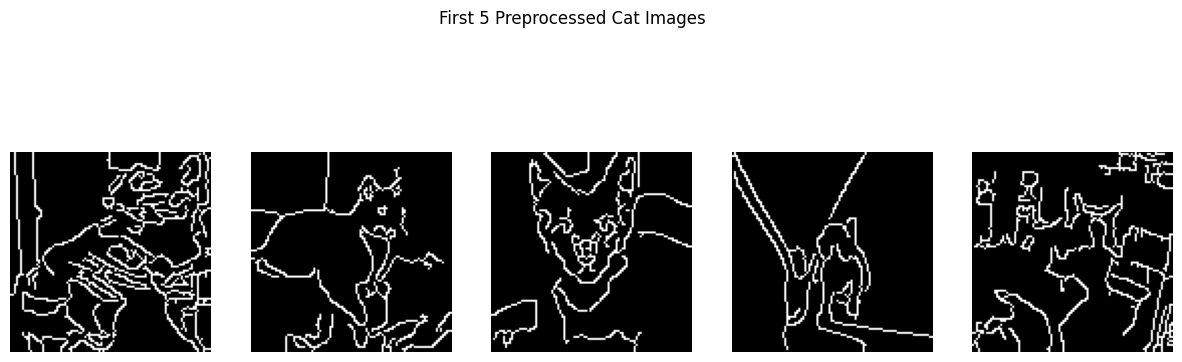

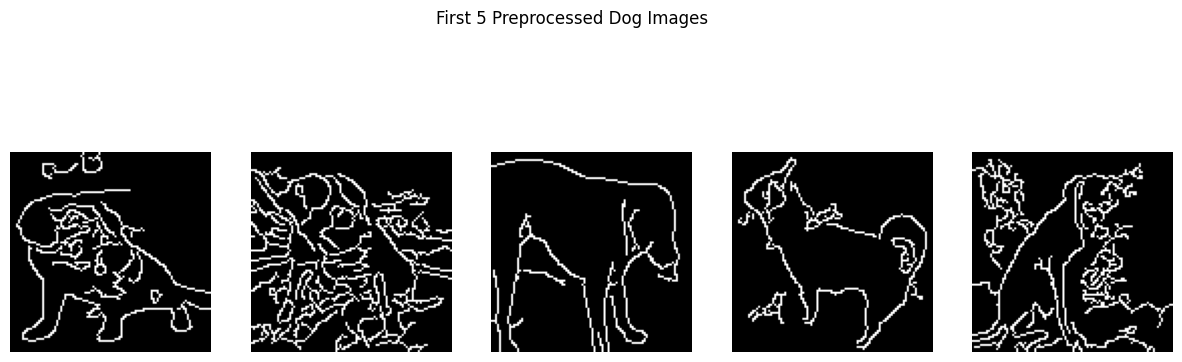

In [64]:
def display_images(images, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for ax, img in zip(axes, images):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    fig.suptitle(title)
    plt.show()

# Load and preprocess the first 5 images for display
def load_and_display_images(folder, num_images=5):
    images = {'Cat': [], 'Dog': []}
    for label in ['Cat', 'Dog']:
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder)[:num_images]:  # Limit to the first few images for each category
            img_path = os.path.join(label_folder, filename)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    preprocessed_img = preprocess_image(img)
                    images[label].append(preprocessed_img)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                pass
    return images

# Load and display the preprocessed images
images_to_display = load_and_display_images(train_folder_gray)
display_images(images_to_display['Cat'], 'First 5 Preprocessed Cat Images')
display_images(images_to_display['Dog'], 'First 5 Preprocessed Dog Images')


In [65]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def preprocess_image(img):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Apply Canny edge detection with specified thresholds
    edges = cv2.Canny(blurred, 50, 200)
    
    # Compute HOG features
    hog_features, hog_image = hog(edges, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, feature_vector=True)
    
    return hog_features

def load_images_and_preprocess(folder):
    images = []
    labels = []
    for label in ['Cat', 'Dog']:
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    hog_features = preprocess_image(img)
                    images.append(hog_features)
                    labels.append(0 if label == 'Cat' else 1)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                pass
    return np.array(images), np.array(labels)

# Define paths
preprocess_path_gray = '/Users/blanchepenafiel/Desktop/Dataset/Preprocess_Gray'
train_folder_gray = os.path.join(preprocess_path_gray, 'Train')
val_folder_gray = os.path.join(preprocess_path_gray, 'Val')

# Load training and validation data
X_train_gray_5, y_train_gray_5 = load_images_and_preprocess(train_folder_gray)
X_val_gray_5, y_val_gray_5 = load_images_and_preprocess(val_folder_gray)

# Verify shapes of the loaded data
print(f"Shape of X_train_gray_5: {X_train_gray_5.shape}")
print(f"Shape of y_train_gray_5: {y_train_gray_5.shape}")
print(f"Shape of X_val_gray_5: {X_val_gray_5.shape}")
print(f"Shape of y_val_gray_5: {y_val_gray_5.shape}")


Shape of X_train_gray_5: (21974, 4356)
Shape of y_train_gray_5: (21974,)
Shape of X_val_gray_5: (1899, 4356)
Shape of y_val_gray_5: (1899,)


In [66]:
# Create and train the Random Forest classifier
clf_gray_5 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_gray_5.fit(X_train_gray_5, y_train_gray_5)

# Predict on the validation set
y_val_pred_gray_5 = clf_gray_5.predict(X_val_gray_5)

# Evaluate the model on the validation set
val_accuracy_gray_5 = accuracy_score(y_val_gray_5, y_val_pred_gray_5)
print(f"Validation Accuracy: {val_accuracy_gray_5:.2f}")
print(classification_report(y_val_gray_5, y_val_pred_gray_5, target_names=['Cat', 'Dog']))


Validation Accuracy: 0.68
              precision    recall  f1-score   support

         Cat       0.70      0.67      0.69      1000
         Dog       0.65      0.68      0.67       899

    accuracy                           0.68      1899
   macro avg       0.68      0.68      0.68      1899
weighted avg       0.68      0.68      0.68      1899



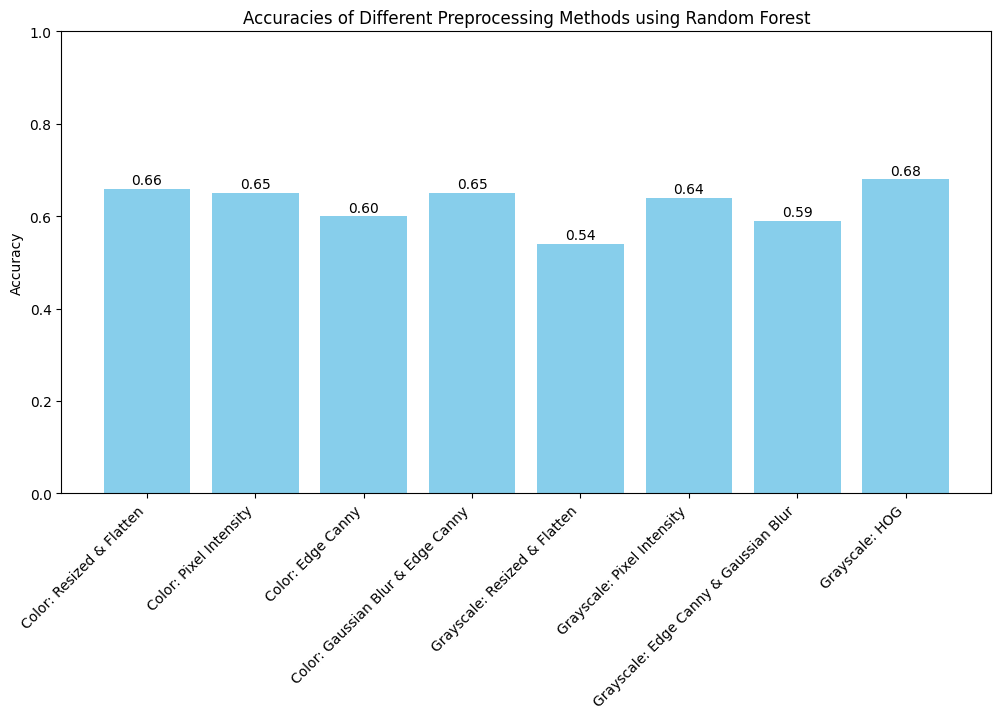

In [73]:

methods = [
    'Color: Resized & Flatten', 'Color: Pixel Intensity', 'Color: Edge Canny', 'Color: Gaussian Blur & Edge Canny',
    'Grayscale: Resized & Flatten', 'Grayscale: Pixel Intensity', 'Grayscale: Edge Canny & Gaussian Blur', 'Grayscale: HOG'
]
accuracies = [0.66, 0.65, 0.60, 0.65, 0.54, 0.64, 0.59, 0.68]

plt.figure(figsize=(12, 6))
plt.bar(methods, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Preprocessing Methods using Random Forest')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center')
plt.show()


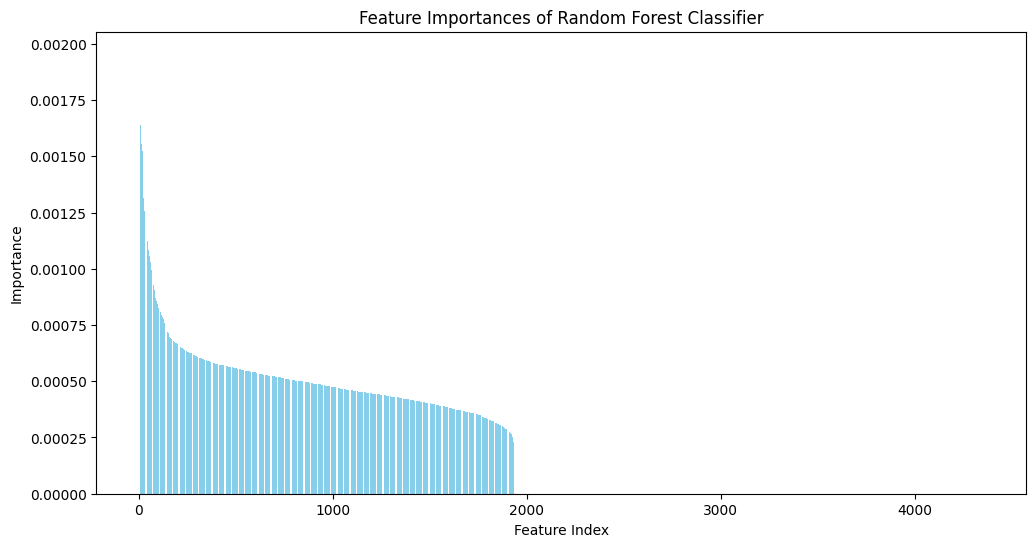

In [72]:

importances = clf_gray_5.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(12, 6))
plt.title('Feature Importances of Random Forest Classifier')
plt.bar(range(X_train_gray_5.shape[1]), importances[indices], color='skyblue', align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()
